## Aufgabe 1 (Ecken)

In [2]:
import itertools
from pulp import *
import numpy as np
import pandas as pd

import re 
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

``` python
Maximize
      16 x1 +   32 x2
subject to
      20 x1 +   10 x2 <= 8000
       4 x1 +    5 x2 <= 2000
       6 x1 +   15 x2 <= 4500
end
```

### (a) Bestimmen Sie alle Ecken des zulässigen Bereichs XLP.

In [3]:
from gurobipy import *

In [4]:
opt_mod = Model(name = 'linear program')

x1 = opt_mod.addVar(name = 'x1', vtype = GRB.CONTINUOUS, lb = 0)
x2 = opt_mod.addVar(name = 'x2', vtype = GRB.CONTINUOUS, lb = 0)

obj_fn = 16 *x1 + 32* x2
opt_mod.setObjective(obj_fn, GRB.MAXIMIZE) 

c1 = opt_mod.addConstr(   20*x1 +   10*x2 <= 8000, name = 'c1')
c2 = opt_mod.addConstr(    4*x1 +    5*x2 <= 2000, name = 'c2')
c3 = opt_mod.addConstr(    6*x1 +   15*x2 <= 4500, name = 'c3')
opt_mod.Params.LogToConsole = 0
opt_mod.optimize()

Academic license - for non-commercial use only - expires 2021-07-18
Using license file C:\Users\eaut2\gurobi.lic


### (b) Geben Sie eine optimale Lösung für LP an.

In [5]:
print('Objective Funktion Value: %f'% opt_mod.objVal)
for v in opt_mod.getVars():
    print('%s: %g' %(v.varName,v.x))

Objective Funktion Value: 10400.000000
x1: 250
x2: 200


### (c) Welche optimale Lösung ergibt sich, wenn die Zielfunktion 
``` python
       max 32x1 + 16x2
``` 
### lautet?

In [6]:
# Hier das gleiche mit pulp
prob = LpProblem('LP', LpMaximize)
x11 = LpVariable('x11', lowBound = 0)
x22 = LpVariable('x22', lowBound = 0)

prob += 32 *x11 +   16 *x22
prob += 20*x11 +   10*x22 <= 8000
prob += 4*x11 +    5*x22 <= 2000
prob += 6*x11 +   15*x22 <= 4500
optimization_result = prob.solve()

print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
a = []
for v in prob.variables():
    a.append(v.varValue)
    print(v.name, "=", v.varValue)
a

Status: Optimal
Optimal Solution to the problem:  12800.0
Individual decision_variables: 
x11 = 400.0
x22 = 0.0


[400.0, 0.0]

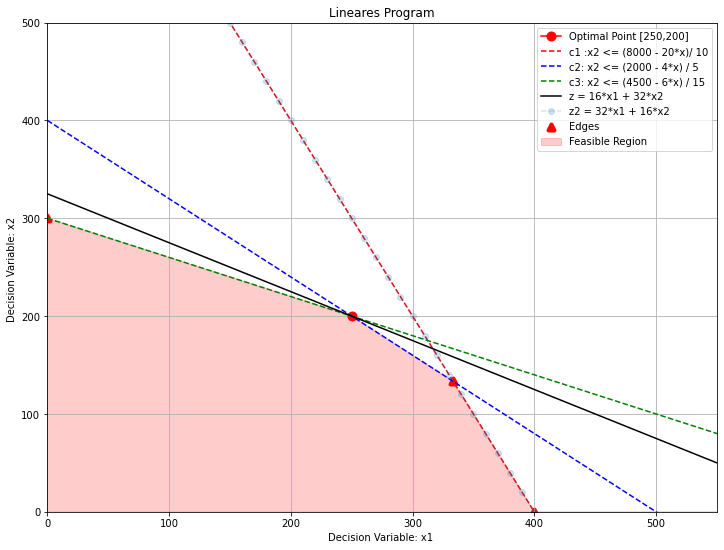

In [7]:
x =  np.arange(0,600,10)

b = 16*x1.x + 32*x2.x
z = (b - 16*x) / 32 

b2 = 32*a[0]+ 16*a[1]
z2 = (b2 - 32*x) / 16 

a1 = (8000 - 20*x) / 10
a2 = (2000 - 4*x) / 5
a3 = (4500 - 6*x) /15
a4 = np.minimum(np.minimum(a1,a2),a3)

plt.figure(figsize=(12,9))
plt.title('Lineares Program')
plt.scatter([333.33,400,0],[133.33,0,300],color="red",marker="^",linewidths=4, edgecolors='r', label = 'Edges')
plt.plot(x1.X,x2.X,marker="o", color = 'r',label = 'Optimal Point [250,200]', markersize=9)
plt.plot(x, a1, 'r--', label = 'c1 :x2 <= (8000 - 20*x)/ 10')
plt.plot(x, a2, 'b--', label = 'c2: x2 <= (2000 - 4*x) / 5' )
plt.plot(x, a3, 'g--', label = 'c3: x2 <= (4500 - 6*x) / 15')


plt.plot(x, z, 'k', label = 'z = 16*x1 + 32*x2')
plt.plot(x, z2, 'o--', label = 'z2 = 32*x1 + 16*x2', alpha = 0.2)

plt.fill_between(x,a4,color='r',alpha=0.2,label = 'Feasible Region')
plt.xlim([0, 550])
plt.ylim([0, 500])
plt.xlabel("Decision Variable: x1 ")
plt.ylabel("Decision Variable: x2 ")
plt.legend()
plt.grid()
plt.show()

## Aufgabe 1 (Simplexalgorithmus)

### (a) Maximiere 

``` python
Maximize
       x1 +    x2
subject to
      4x1 +    x2 <= 20
              4x2 <= 10
      2x1 +   3x2 <= 12
end
```

In [8]:
opt_mod = Model(name = 'linear program Simplex')

x1 = opt_mod.addVar(name = 'x1', vtype = GRB.CONTINUOUS, lb = 0)
x2 = opt_mod.addVar(name = 'x2', vtype = GRB.CONTINUOUS, lb = 0)

obj_fn = x1 + x2
opt_mod.setObjective(obj_fn, GRB.MAXIMIZE) 

c1 = opt_mod.addConstr(   4*x1 +    x2 <= 20, name = 'c1')
c2 = opt_mod.addConstr(           4*x2 <= 10, name = 'c2')
c3 = opt_mod.addConstr(    2*x1 + 3*x2 <= 12, name = 'c3')
opt_mod.Params.LogToConsole = 0
opt_mod.optimize() 

In [9]:
print('Objective Funktion Value: %f'% opt_mod.objVal)
for v in opt_mod.getVars():
    print('%s: %g' %(v.varName,v.x))

Objective Funktion Value: 5.600000
x1: 4.8
x2: 0.8


### (b) Maximiere 

``` python
Maximize
      2x1 + x2 + x3 + 2x4 + 2x5
subject to
      x1 +       x3 + x4 + 2x5 <= 4
     2x1 + 2x2 + x3 +       x5 <= 6
      x1 + 2x2 +     2x4 +  x5 <= 8

end
```

In [10]:
opt_mod = Model(name = 'linear program Simplex')

x1 = opt_mod.addVar(name = 'x1', vtype = GRB.CONTINUOUS, lb = 0)
x2 = opt_mod.addVar(name = 'x2', vtype = GRB.CONTINUOUS, lb = 0)
x3 = opt_mod.addVar(name = 'x3', vtype = GRB.CONTINUOUS, lb = 0)
x4 = opt_mod.addVar(name = 'x4', vtype = GRB.CONTINUOUS, lb = 0)
x5 = opt_mod.addVar(name = 'x5', vtype = GRB.CONTINUOUS, lb = 0)

obj_fn = 2*x1 + x2 + x3 + 2*x4 + 2*x5
opt_mod.setObjective(obj_fn, GRB.MAXIMIZE) 

c1 = opt_mod.addConstr(   x1 +       x3 + x4 + 2*x5 <= 4, name = 'c1')
c2 = opt_mod.addConstr( 2*x1 + 2*x2 + x3 +       x5 <= 6, name = 'c2')
c3 = opt_mod.addConstr(   x1 + 2*x2 +    2*x4 +   x5 <= 8, name = 'c3')
opt_mod.Params.LogToConsole = 0
opt_mod.optimize() 

In [11]:
print('Objective Funktion Value: %f'% opt_mod.objVal)
for v in opt_mod.getVars():
    print('%s: %g' %(v.varName,v.x))

Objective Funktion Value: 9.000000
x1: 2
x2: 1
x3: 0
x4: 2
x5: 0


## Eckenalgorithmus

In [14]:
A = [[20,10,1,0,0],
      [4,5,0,1,0],
    [6,15,0,0,1]]

b = [8000,2000,4500]

c = [16,32,0,0,0]
c2 = [32,16,0,0,0]

def edge_alg(c:list=None, A:list=None, b:list=None):
    # Erstellt alle Kombinationen/Permutationen und behält nur die Kombinationen, die keine Fehlstellung besitzen
    all_combinations = list(itertools.permutations([i for i in range(len(A[0]))],len(b)))
    combinations = []

    for e in all_combinations:
        if list(e) == sorted(e):
            combinations.append(e)


    #Generiert Matrizen abhängig der verschiedenen Permutationen/Kombinationen
    solutions = []
    for permut in combinations:
        Abk = np.zeros((len(A), len(A)))
        for col in range(len(Abk)):
            for row in range(len(Abk)):
                Abk[row][col] = A[row][permut[col]]
        if np.linalg.det(Abk) != 0:   #Prüft ob es sich um eine reguläre Matrix handelt
            check = True
            solution = (np.linalg.solve(Abk,b))
            for i in solution:
                if i < 0:           #Prüft die einzelnen Einträge der Lösung auf negative Werte
                    check = False
            if check:
                solutions.append([permut, solution])

    #Berechnet z-Werte für die jeweiligen Ecken
    z=[]
    for solution in solutions:
        summe = 0
        for i in range(len(c)):
            if i in solution[0]:
                summe += c[i]*solution[1][solution[0].index(i)]
        z.append((summe,solution))
    return z

def print_z(z):
    print("====================================")
    print("[z-value, [x[i],     x-Wert[i]]]")
    [print(e) for e in z]
    print("====================================")

z = edge_alg(c, A, b)
print_z(z)

[z-value, [x[i],     x-Wert[i]]]
(10400.0, [(0, 1, 2), array([ 250.,  200., 1000.])])
(9600.0, [(0, 1, 4), array([333.33333333, 133.33333333, 500.        ])])
(6400.0, [(0, 3, 4), array([ 400.,  400., 2100.])])
(9600.0, [(1, 2, 3), array([ 300., 5000.,  500.])])
(0.0, [(2, 3, 4), array([8000., 2000., 4500.])])
